# Songs

#### Intital Data Inspection

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/rolling_stones_spotify.csv')

In [6]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


##### Data types

In [7]:
data_types_info = df.info()
print(data_types_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


##### Summary Statistics

In [8]:
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

##### Check for duplicates

In [9]:
# Excluding the first column as it contains serial numbers (see above)
duplicates = df[df.duplicated(subset=df.columns[1:])]

if not duplicates.empty:
    print(f'Duplicate rows found\n\n{duplicates}')
    print(f'Removing duplicates')
    df = df.drop_duplicates(subset=df.columns[1:])
    print(f'Duplicates removed')
else:
    print(f'No duplicate rows found')

No duplicate rows found


##### Check for missing values

In [10]:
missing_values = df.isnull().sum()

if missing_values.sum() > 0:
    print(f'Missing values found.\nDropping rows with missing values.')
    df = df.dropna()
    print(f'Rows with missing values dropped.')
else:
    print(f'No missing values found.')

No missing values found.


### Further Exploratory Data Analysis

In [11]:
# Visualizing distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

This chart helps us understand the distribution of 'danceability' values in the dataset. 
You can observe whether the majority of songs have low, medium, or high danceability and identify any patterns or clusters in the data. 

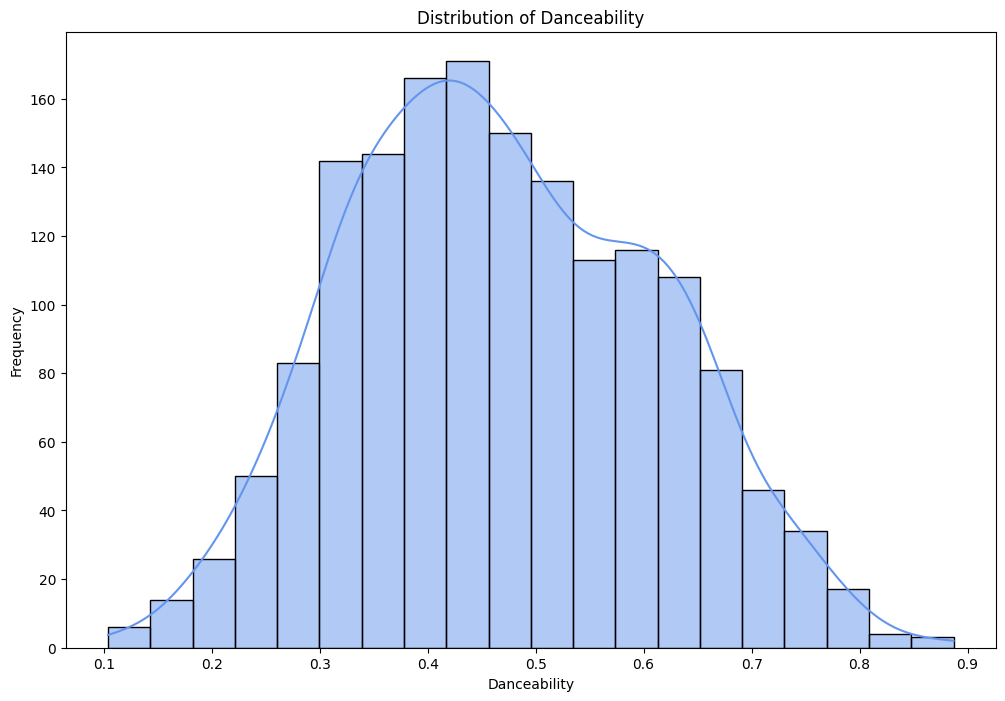

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(df['danceability'], bins=20, kde=True, color='cornflowerblue')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

The following chart helps us understand the distribution of 'energy' values in the dataset.
You can observe whether the majority of songs have low, medium, or high energy levels and identify any patterns or clusters in the data. 
The KDE overlay provides a smooth curve that helps in visually understanding the shape of the distribution.

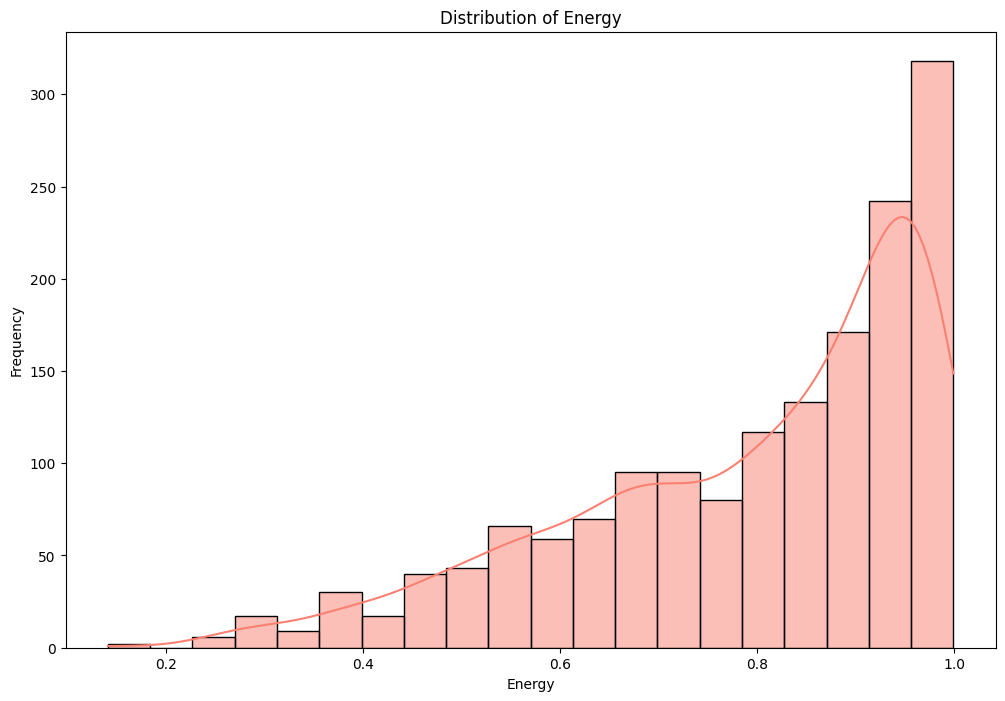

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(df['energy'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

Visualizing Valence can help understand the music positiveness conveyed by the tracks.

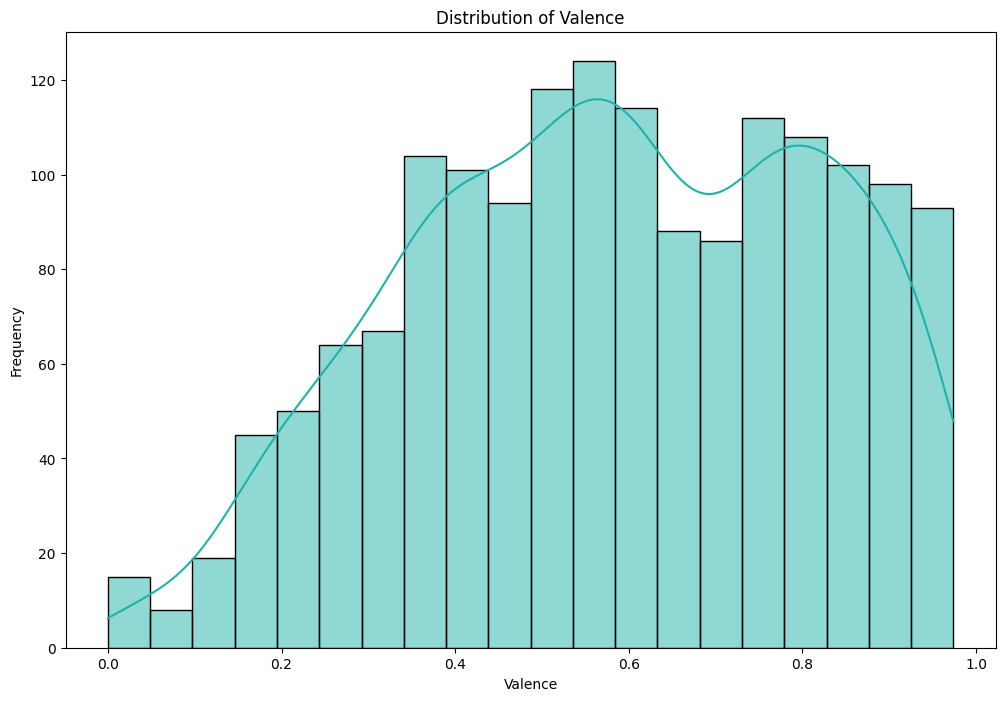

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(df['valence'], bins=20, kde=True, color='lightseagreen')
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

##### Two albums to be recommended to anyone based on the number of popular songs

In [15]:
# Approach and steps:

# Calculate the average populatiry of each album
average_popularity_by_album = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

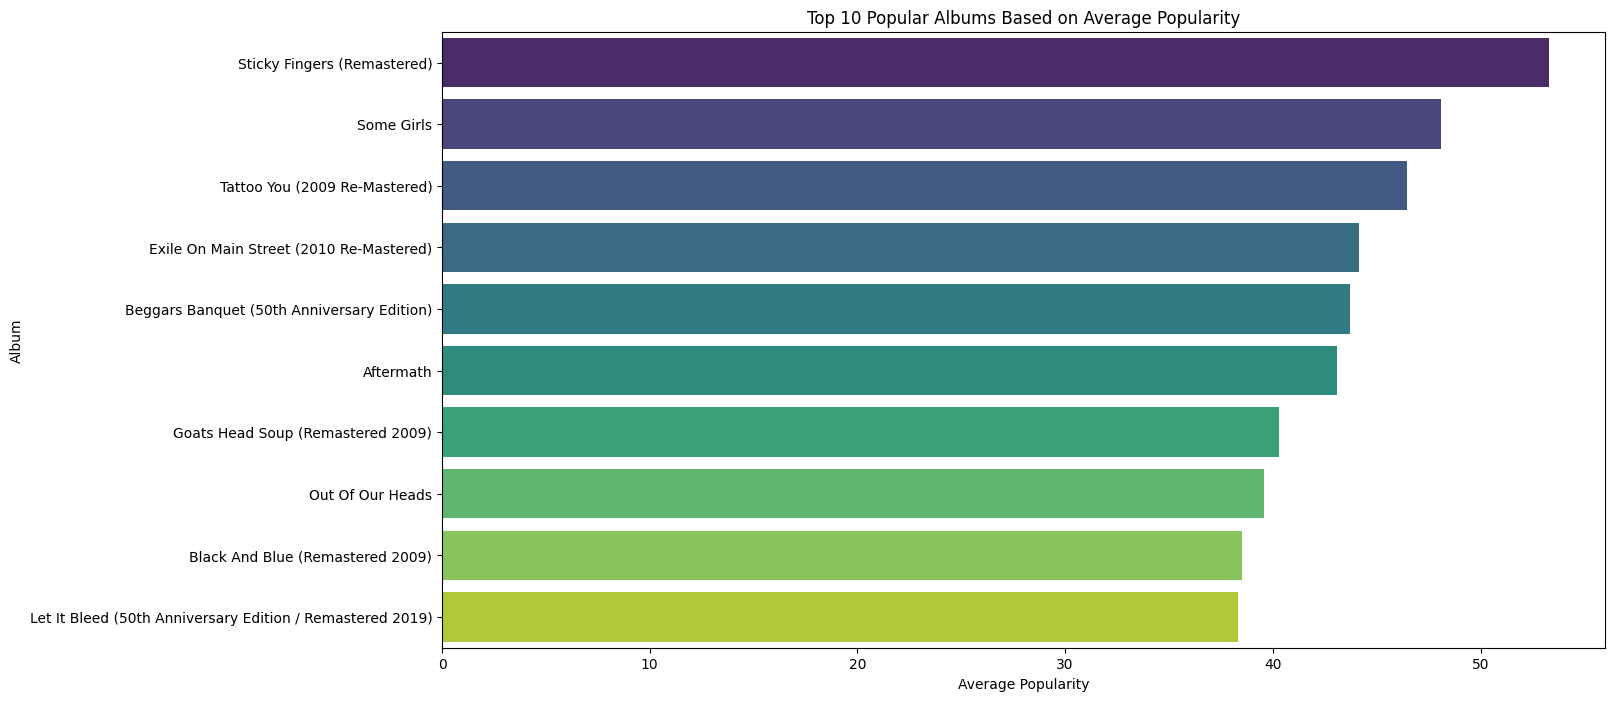

In [16]:
# Chart for popularity - top 10 albums
top_10_popular_albums = average_popularity_by_album.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_popular_albums.values, y=top_10_popular_albums.index, palette='viridis')
plt.title('Top 10 Popular Albums Based on Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()

In [17]:
# Print the top 2 recommended albums
recommended_albums = average_popularity_by_album.head(2)
print(f'Recommended Albums Based on Popular Songs:\n\n{recommended_albums}')

Recommended Albums Based on Popular Songs:

album
Sticky Fingers (Remastered)    53.3
Some Girls                     48.1
Name: popularity, dtype: float64


### Cluster Analysis

##### Identifying

In [18]:
# Identifying right number of colusters.
# Scaling the features - best practice to ensure that they have the same impact on the clustering process.

from sklearn.preprocessing import StandardScaler

# Features for clustering
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# dataframe with selected features
feature_df = df[selected_features]

# Standardise
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_df)

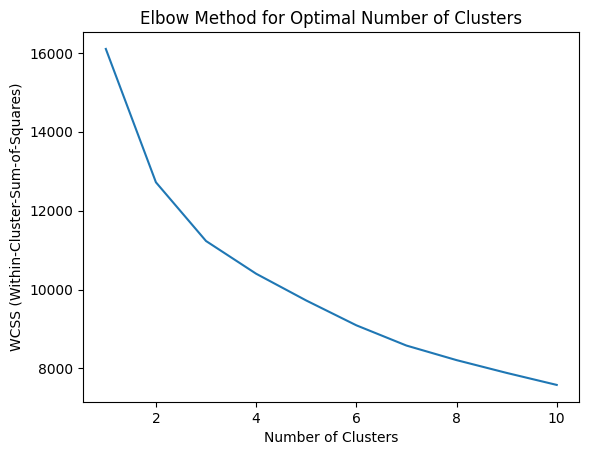

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()


##### Clustring Algorithm

In [20]:
# Number of clusters based on the Elbow Method result
num_clusters = 3 

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


##### Cluster definition based on features

In [21]:
# Average values of the features within each cluster
cluster_characteristics = df.groupby('cluster')[selected_features].mean()
print(cluster_characteristics)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.423355      0.498393  0.569402          0.090611  0.278149   
1            0.186092      0.562661  0.825172          0.229920  0.295580   
2            0.185661      0.362546  0.921568          0.156890  0.822348   

         loudness  speechiness       tempo   valence  popularity  
cluster                                                           
0       -9.774733     0.046300  115.976525  0.497420   21.210046  
1       -6.453704     0.048727  121.851054  0.787511   24.127240  
2       -5.442671     0.104961  137.135940  0.456002   17.452769  


#### IIT Song Cohorts Project

##### Overview

The IIT Song Cohorts project is a Data Science and Machine Learning initiative aimed at creating cohorts of songs based on various features. In this project, we explore and analyze a dataset of songs, leveraging clustering techniques to group similar songs together. The primary goal is to gain insights into the factors that contribute to creating cohorts of songs, with the potential application in enhancing song recommendations for users.

#### IIT Song Cohorts Project

##### Overview

The IIT Song Cohorts project is a Data Science and Machine Learning initiative aimed at creating cohorts of songs based on various features. In this project, we explore and analyze a dataset of songs, leveraging clustering techniques to group similar songs together. The primary goal is to gain insights into the factors that contribute to creating cohorts of songs, with the potential application in enhancing song recommendations for users.

#### Project Tasks

1. **Exploratory Data Analysis (EDA):** Investigate and understand the dataset, perform data cleaning, and explore the distribution of key features.

2. **Recommend Albums Based on Popular Songs:** Utilize visualizations to identify albums with the highest average popularity and recommend them based on the number of popular songs.

3. **Cluster Analysis:** Apply clustering algorithms to group songs into cohorts based on relevant features. Determine the optimal number of clusters, choose an appropriate clustering algorithm, and define each cluster based on the features.

#### Libraries needed

- Pandas
- scikit-learn
- matplotlib
- seaborn

#### Libraries needed

- Pandas
- scikit-learn
- matplotlib
- seaborn

### Fabian Felix